In [24]:
#
import numpy as np
import pandas as pd
#
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_unweighted
import datetime
import seaborn as sns
plt.style.use('ggplot')  
#
from IPython import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_auc_score, precision_score, recall_score,  roc_curve, auc, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA


# Dictionary

* Player: Player's name;
* Nationality: Country of origin or citizenship;
* Position: Positions played(GK = Goalkeeper,DF = Defender,MF = Midfielders,FW = Forwards, LB = Left Backs, RB = Right Backs, CB = Center Backs, DM = Defensive Midfielders, CM = Central Midielders, LM = Left Midfielders, RM = Right Midfielders, WM = Wide Midfielders, LW = Left Wingers, RW = Right Wingers, AM = Attacking Midfielders);
* Squad: Player's Team
* Age: Age in 2022 season
* Born: Year of Birth
* 90s: Total minutes played divided by 90;
* CrdY: Yellow cards;
* CrdR: Red cards;
* 2CrdY: Second Yellow Card;
* Fls: Refers to the number of fouls committed by the player;
* Fid: Refers to the number of fouls suffered, i.e., the number of times the player was fouled by an opponent;
* Off: Represents the number of times the player was caught offside;
* Crs: Refers to the number of crosses made by the player, usually to create goal-scoring opportunities;
* Int: Refers to the number of interceptions made by the player, i.e., the number of passes or balls he managed to cut off or deflect;
* TklW: Indicates the number of successful tackles in which the player’s team won possession of the ball;
* PKwon: Refers to the number of penalty kicks won by the player, typically from being fouled inside the opponent's penalty area;
* PKcon: Indicates the number of penalty kicks conceded by the player, i.e., the number of penalties given against the team due to fouls committed by the player;
* OG: Refers to the number of own goals scored by the player, i.e., when he accidentally scores in his own team’s goal;
* Recov: Represents the number of loose balls recovered by the player;
* won: Refers to the number of aerial duels won by the player, i.e., the number of contested aerial balls the player won;
* lost: ndicates the number of aerial duels lost by the player, i.e., the number of contested aerial balls the player did not win;


The datasets are from https://fbref.com 

In [2]:
df_Brasileirao_Players = pd.read_csv(
    "FBREF/SerieA-Brasil/Brazil-SerieA-Players-2022.csv", sep=";"
)
df_Brasileirao_Players['Champ'] = 'BRA'
df_PremierLeague_Players = pd.read_csv(
    "FBREF/PremierLegue/Premier-League-Players2021-2022.csv", sep=";", decimal="."
)
df_PremierLeague_Players = df_PremierLeague_Players[df_PremierLeague_Players.columns[0:-2]]
df_PremierLeague_Players['Champ'] = 'ENG'
df_Ligue1_Players = pd.read_csv(
    "FBREF/Ligue1/Ligue-Players-2021-2022.csv", sep=";", decimal="."
)
df_Ligue1_Players['Champ'] = 'FRA'
df_LaLiga_Players = pd.read_csv("FBREF/LaLiga/LaLiga-Players-2022.csv", sep=";")
df_LaLiga_Players['Champ'] = 'SPN'
df_Italy_Players = pd.read_csv(
    "FBREF/SerieA-Italia/SerieA-Players-2021-2022.csv", sep=";"
)
df_Italy_Players['Champ'] = 'ITA'
df_ChampionsLeague = pd.read_csv(
    "FBREF/ChampionsLeague/ChampionsLeague-Players-2021-2022.csv", sep=";"
)
df_ChampionsLeague['Champ'] = 'EUR'

In [3]:
df_Brasileirao_Players.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'CrdY',
       'CrdR', '2CrdY', 'Fls', 'Fld', 'Off', 'Crs', 'Int', 'TklW', 'PKwon',
       'PKcon', 'OG', 'Recov', 'Won', 'Lost', 'Champ'],
      dtype='object')

In [4]:
df_PremierLeague_Players.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'CrdY',
       'CrdR', '2CrdY', 'Fls', 'Fld', 'Off', 'Crs', 'Int', 'TklW', 'PKwon',
       'PKcon', 'OG', 'Recov', 'Won', 'Lost', 'Champ'],
      dtype='object')

In [6]:
df_Ligue1_Players.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'CrdY',
       'CrdR', '2CrdY', 'Fls', 'Fld', 'Off', 'Crs', 'Int', 'TklW', 'PKwon',
       'PKcon', 'OG', 'Recov', 'Won', 'Lost', 'Champ'],
      dtype='object')

In [7]:
df_LaLiga_Players.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'CrdY',
       'CrdR', '2CrdY', 'Fls', 'Fld', 'Off', 'Crs', 'Int', 'TklW', 'PKwon',
       'PKcon', 'OG', 'Recov', 'Won', 'Lost', 'Champ'],
      dtype='object')

In [8]:
df_Italy_Players.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'CrdY',
       'CrdR', '2CrdY', 'Fls', 'Fld', 'Off', 'Crs', 'Int', 'TklW', 'PKwon',
       'PKcon', 'OG', 'Recov', 'Won', 'Lost', 'Champ'],
      dtype='object')

In [9]:
df_ChampionsLeague.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'CrdY',
       'CrdR', '2CrdY', 'Fls', 'Fld', 'Off', 'Crs', 'Int', 'TklW', 'PKwon',
       'PKcon', 'OG', 'Recov', 'Won', 'Lost', 'Champ'],
      dtype='object')

In [5]:
cols = ['Age', 'Born', '90s', 'CrdY',
       'CrdR', '2CrdY', 'Fls', 'Fld', 'Off', 'Crs', 'Int', 'TklW', 'PKwon',
       'PKcon', 'OG']

df = pd.concat([df_Brasileirao_Players,df_PremierLeague_Players,df_Ligue1_Players,df_LaLiga_Players,df_Italy_Players,df_ChampionsLeague],ignore_index=True)
df.drop(df.loc[df.Rk=='Rk'].index,inplace=True)
for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)


Definying the target variable as type of player(Offensive/Deffensive), any Defenser(DF) or GoalKeeper(GK) is a Deffensive(0) and Foward(FW) is Offensive(1). If a player is Defenser and Fowards a type 1 is given.

In [6]:
df.loc[df[(df.Pos.str.contains('DF')|(df.Pos.str.contains('GK')))].index,'Type'] = 0
#df['Type'] = np.zeros(len(df))
df.loc[df[df.Pos.str.contains('FW')].index,'Type'] = 1
df

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,CrdY,CrdR,...,Int,TklW,PKwon,PKcon,OG,Recov,Won,Lost,Champ,Type
0,1,Abner,brBRA,DF,Atl Paranaense,21,2000,23,6,0,...,39,28,0,0,0,149.0,21.0,28.0,BRA,0.0
1,2,Adryelson,brBRA,DF,Botafogo (RJ),23,1998,16,1,0,...,22,12,0,0,1,56.0,76.0,34.0,BRA,0.0
2,3,Adson,brBRA,"FW,MF",Corinthians,21,2000,13,2,0,...,13,22,0,0,0,54.0,8.0,19.0,BRA,1.0
3,4,Airton,brBRA,FW,Atl Goianiense,22,1999,19,3,0,...,10,24,0,0,0,60.0,21.0,23.0,BRA,1.0
4,5,Carlos Alberto,brBRA,"FW,MF",América (MG),19,2002,1,1,0,...,4,1,0,0,0,5.0,4.0,9.0,BRA,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3927,746,Davide Zappacosta,itITA,DF,it Atalanta,29,1992,4,1,0,...,2,3,0,0,0,11.0,0.0,1.0,EUR,0.0
3928,747,Cedric Zesiger,chSUI,DF,ch Young Boys,23,1998,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,EUR,0.0
3929,748,Edon Zhegrova,xkKVX,FW,fr Lille,22,1999,0,0,0,...,0,0,0,0,0,2.0,0.0,0.0,EUR,1.0
3930,749,Oleksandr Zinchenko,uaUKR,"DF,MF",eng Manchester City,24,1996,5,2,0,...,11,5,0,0,0,30.0,12.0,8.0,EUR,0.0


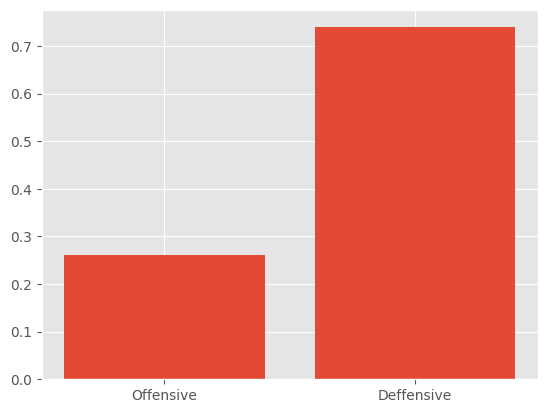

In [63]:
pct = df['Type'].sum()/len(df)
plt.bar(x = ['Offensive','Deffensive'],height=[pct,1-pct])
plt.show()

In [7]:
Player, Player_test = train_test_split(
    df, test_size=0.25, random_state=42
)
Player

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,CrdY,CrdR,...,Int,TklW,PKwon,PKcon,OG,Recov,Won,Lost,Champ,Type
3636,455,Youssoufa Moukoko,deGER,FW,de Dortmund,16,2004,0,1,0,...,0,0,0,0,0,0.0,0.0,0.0,EUR,1.0
1742,413,Batista Mendy,frFRA,"MF,DF",Angers,21,2000,26,5,0,...,34,28,0,1,2,165.0,24.0,24.0,FRA,0.0
576,577,Wellington Rato,brBRA,"FW,MF",Atl Goianiense,29,1992,30,3,0,...,10,22,0,0,0,154.0,18.0,27.0,BRA,1.0
993,223,Kelechi Iheanacho,ngNGA,FW,Leicester City,24,1996,14,1,0,...,4,7,0,0,0,42,16,38,ENG,1.0
3796,615,Shola Shoretire,engENG,MF,eng Manchester Utd,17,2004,0,1,0,...,0,1,0,0,0,1.0,0.0,0.0,EUR,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,368,Robin Olsen,seSWE,GK,Aston Villa,31,1990,1,0,0,...,0,0,0,0,0,0,0,0,ENG,0.0
1315,532,Harry Winks,engENG,MF,Tottenham,25,1996,10,2,0,...,16,10,0,0,0,47,4,4,ENG,NaN
863,98,Philippe Coutinho,brBRA,"MF,FW",Aston Villa,29,1992,14,0,0,...,7,12,0,0,0,53,5,17,ENG,1.0
3528,347,Noa Lang,nlNED,"MF,FW",be Club Brugge,22,1999,5,3,0,...,4,5,0,0,0,25.0,1.0,3.0,EUR,1.0


## Position

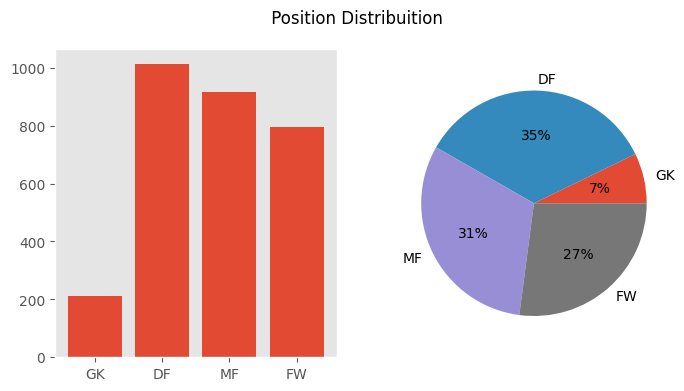

In [14]:

GK = Player[Player.Pos.str.match("GK")]
DF = Player[Player.Pos.str.match("DF")]
MF = Player[Player.Pos.str.match("MF")]
FW = Player[Player.Pos.str.match("FW")]


label = [
    "GK",
    "DF",
    "MF",
    "FW",
]
Npos = [len(GK), len(DF), len(MF), len(FW)]

fig, ax = plt.subplots(1, 2, figsize=(8, 4), dpi=100)
fig.suptitle(" Position Distribuition")

ax[0].grid()
ax[0].bar(
    label,
    Npos,
)
ax[1].pie(
    Npos,
    labels=label,
    autopct="%0.f%%",
)
plt.show()

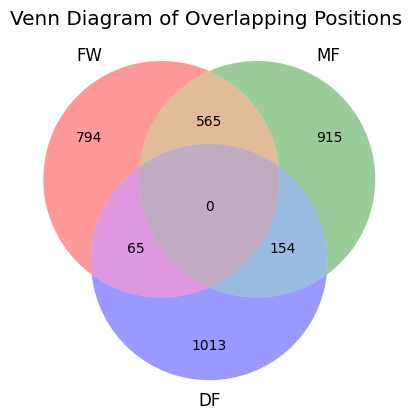

In [18]:
DFMF = Player[(Player.Pos.str.contains("DF")&(Player.Pos.str.contains("MF")))]
DFFW = Player[(Player.Pos.str.contains("DF")&(Player.Pos.str.contains("FW")))]
FWMF = Player[(Player.Pos.str.contains("FW")&(Player.Pos.str.contains("MF")))]
ALL = Player[(Player.Pos.str.contains("FW"))&(Player.Pos.str.contains("DF"))&(Player.Pos.str.contains("MF"))]

#ALL = Player[Player.Pos.str.match("^FW,MF,DF|^FW,DF,MF|^MF,FW,DF|^MF,DF,FW|^DF,FW,MF|^DF,MF,FW")]

fig = plt.figure(figsize=(5, 5), dpi=100)
plt.title("Venn Diagram of Overlapping Positions ")
venn3_unweighted(
    subsets=(len(FW), len(MF), len(FWMF), len(DF), len(DFFW), len(DFMF), len(ALL)),
    set_labels=("FW", "MF", "DF"),
)

plt.show()

## Age

The focus on analyzing age is to determine its distribution and characteristics. Then, to ascertain whether this information holds when the data is segmented by the categories of the Target (Type).

The curtosi of Age Distribuition is -0.4821


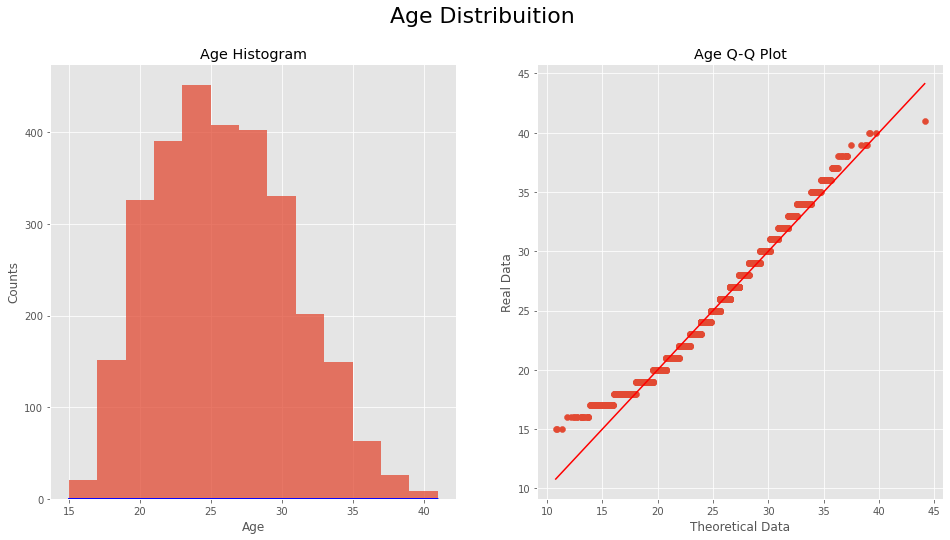

In [65]:
feature = Player["Age"]
mean = feature.mean()
std = feature.std()
quantis = np.random.normal(mean, std, len(feature))
real = feature.values

x = np.linspace(min(feature),max(feature),len(feature))
bell = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-(x - mean)**2 / (2 * std**2))

quantis.sort()
real.sort()
min_value = min(quantis[0], real[0])
max_value = max(quantis[-1], real[-1])

fig, axs = plt.subplots(1,2,figsize = (16,8))
print(f'The curtosi of Age Distribuition is {round(feature.kurtosis(),4)}')

plt.suptitle('Age Distribuition',fontsize = 22)
axs[0].plot(x,bell,color = 'blue')
axs[0].hist(feature, bins = 'sturges', alpha = 0.75)
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Counts')
axs[0].set_title('Age Histogram')


axs[1].scatter(quantis, real, )
axs[1].set_xlabel('Theoretical Data')
axs[1].set_ylabel('Real Data')
axs[1].set_title('Age Q-Q Plot')

axs[1].plot([min_value, max_value], [min_value, max_value], color='red')

plt.show()

Age seems to have a platykurtic normal distribution, given the kurtosis of -0.4821, suggesting flattening in relation to the theoretical normal. The behavior of the Q-Q Plot is similar to distributions with right skewness, as confirmed by the histogram shape.

The Offensive skewness is: 0.2325
The Defensive skewness is: 0.3526


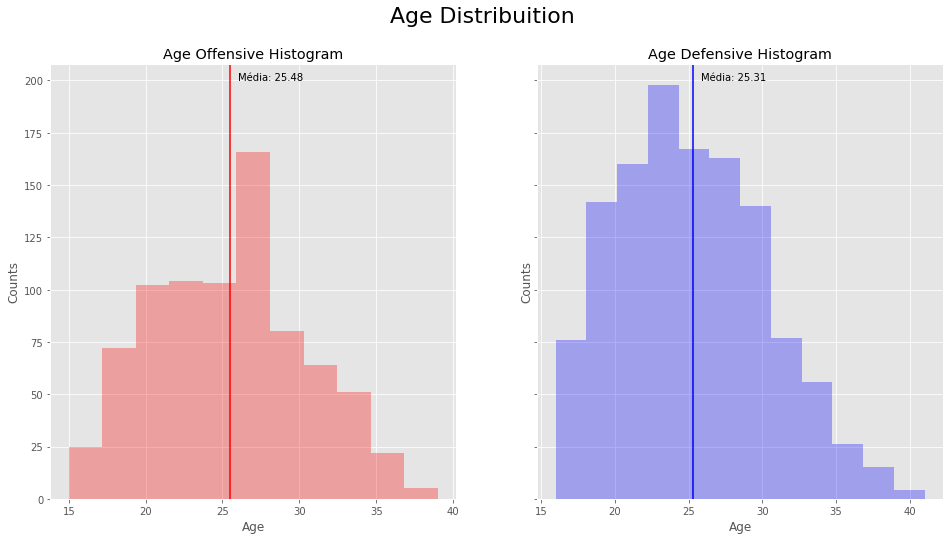

In [94]:
Off = Player.loc[Player.Type == 1]['Age']
Def = Player.loc[Player.Type == 0]['Age']

print(f'The Offensive skewness is: {round(Off.skew(),4)}')
print(f'The Defensive skewness is: {round(Def.skew(),4)}')

fig, axs = plt.subplots(1,2,figsize = (16,8),sharey = True)

plt.suptitle('Age Distribution',fontsize = 22)
axs[0].hist(Off, bins = 'sturges', alpha = 0.3,color = 'red')
axs[0].axvline(Off.mean(),color = 'red')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Counts')
axs[0].set_title('Age Offensive Histogram')
axs[0].text(26,200,f'Média: {round(Off.mean(),2)}')


##
axs[1].hist(Def, bins = 'sturges', alpha = 0.3,color = 'blue')
axs[1].axvline(Def.mean(),color = 'blue')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Counts')
axs[1].set_title('Age Defensive Histogram')
axs[1].text(25.83,200,f'Média: {round(Def.mean(),2)}')

plt.show()


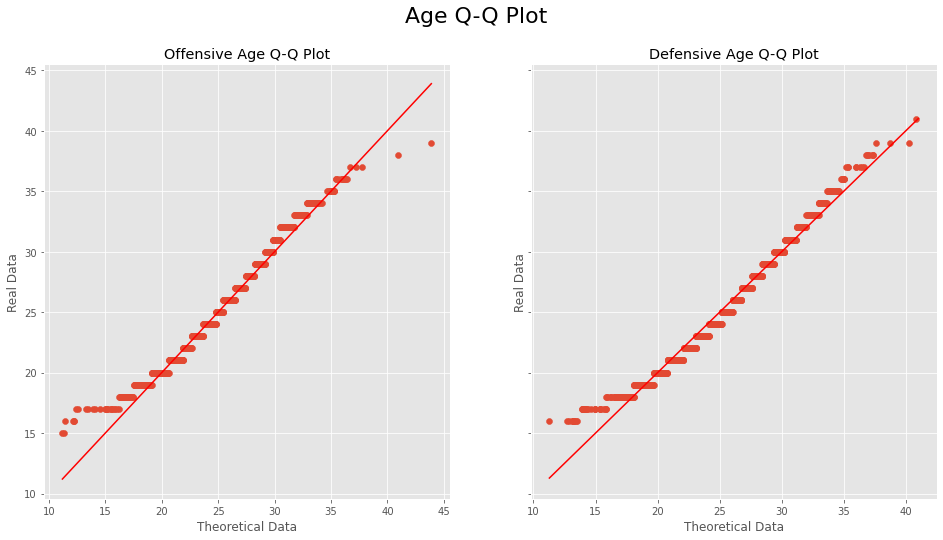

In [98]:
fig, axs = plt.subplots(1,2,figsize = (16,8),sharey = True)

plt.suptitle('Age Q-Q Plot',fontsize = 22)


quantis = np.random.normal(Off.mean(), Off.std(), len(Off))
real = Off.values

x = np.linspace(min(Off),max(Off),len(Off))
bell = (1 / (Off.std() * np.sqrt(2 * np.pi))) * np.exp(-(x - Off.mean())**2 / (2 * Off.std()**2))

quantis.sort()
real.sort()
min_value = min(quantis[0], real[0])
max_value = max(quantis[-1], real[-1])

axs[0].scatter(quantis, real, )
axs[0].set_xlabel('Theoretical Data')
axs[0].set_ylabel('Real Data')
axs[0].set_title('Offensive Age Q-Q Plot')

axs[0].plot([min_value, max_value], [min_value, max_value], color='red')



##
quantis = np.random.normal(Def.mean(), Def.std(), len(Def))
real = Def.values

x = np.linspace(min(Def),max(Def),len(Def))
bell = (1 / (Def.std() * np.sqrt(2 * np.pi))) * np.exp(-(x - Def.mean())**2 / (2 * Def.std()**2))

quantis.sort()
real.sort()
min_value = min(quantis[0], real[0])
max_value = max(quantis[-1], real[-1])


axs[1].scatter(quantis, real, )
axs[1].set_xlabel('Theoretical Data')
axs[1].set_ylabel('Real Data')
axs[1].set_title('Defensive Age Q-Q Plot')

axs[1].plot([min_value, max_value], [min_value, max_value], color='red')

plt.show()

Both groupings by Target appear to have a normal distribution. Even though each mean differs slightly, Offensive and Defensive do not exhibit similar characteristics.

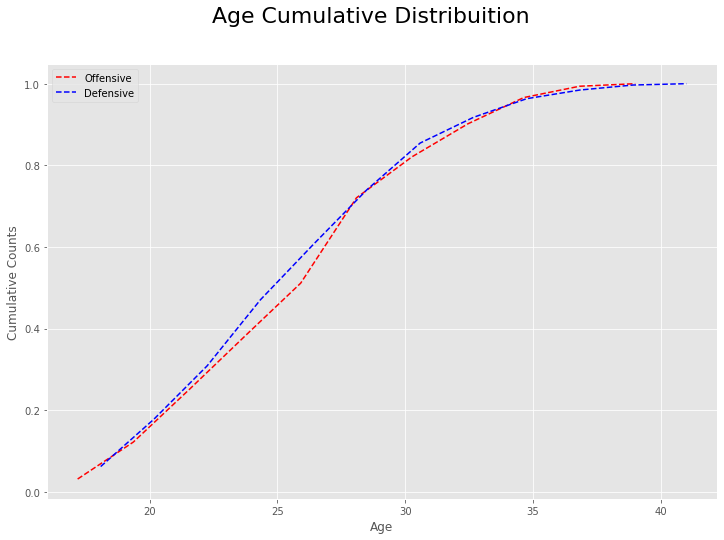

In [89]:

fig, axs = plt.subplots(figsize = (12,8),sharey = True)

plt.suptitle('Age Cumulative Distribuition',fontsize = 22)
##
counts, bin_edges = np.histogram(Off, bins='sturges', density=True)
cdf = np.cumsum(counts) * np.diff(bin_edges)  
axs.plot(bin_edges[1:], cdf, 'r--', label='Offensive')

##
counts, bin_edges = np.histogram(Def, bins='sturges', density=True)
cdf = np.cumsum(counts) * np.diff(bin_edges) 
axs.plot(bin_edges[1:], cdf, 'r--', label='Defensive',color = 'blue')
#
axs.set_xlabel('Age')
axs.set_ylabel('Cumulative Counts')
plt.legend()
plt.show()

## 90s

In [30]:
import scipy.stats as stats

The curtosi of 90s Distribuition is -0.4963


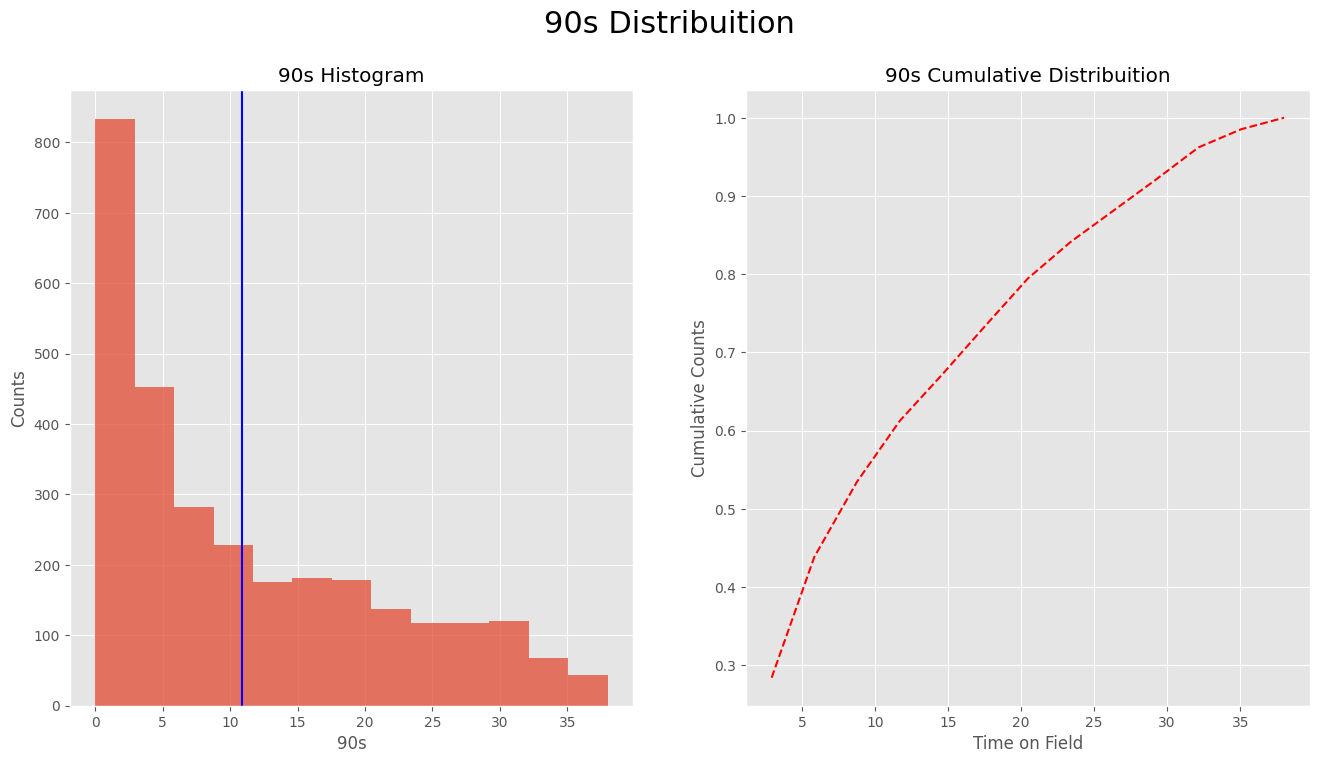

In [15]:

feature = Player["90s"]
mean = feature.mean()
std = feature.std()
quantis = np.random.poisson(mean,len(feature))
real = feature.values

quantis.sort()
real.sort()
min_value = min(quantis[0], real[0])
max_value = max(quantis[-1], real[-1])

counts, bin_edges = np.histogram(feature, bins='sturges', density=True)
cdf = np.cumsum(counts) * np.diff(bin_edges)  



fig, axs = plt.subplots(1,2,figsize = (16,8))
print(f'The curtosi of 90s Distribuition is {round(feature.kurtosis(),4)}')

plt.suptitle('90s Distribuition',fontsize = 22)
axs[0].hist(feature, bins = 'sturges', alpha = 0.75)
axs[0].axvline(mean,color = 'blue')
axs[0].set_xlabel('90s')
axs[0].set_ylabel('Counts')
axs[0].set_title('90s Histogram')


axs[1].plot(bin_edges[1:], cdf, 'r--', label='Cumulative Distribuition')
axs[1].set_xlabel('Time on Field')
axs[1].set_ylabel('Cumulative Counts')
axs[1].set_title('90s Cumulative Distribuition')

plt.show()

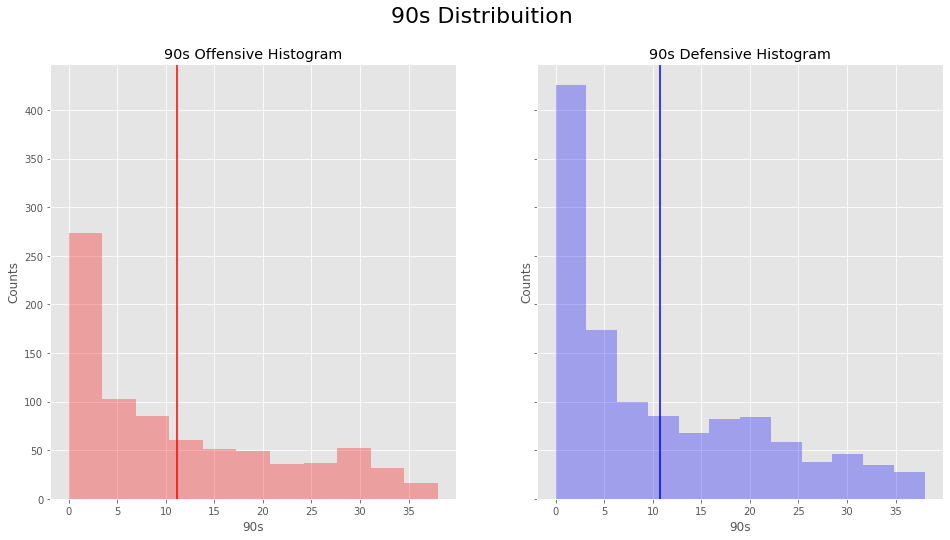

In [76]:
Off = Player.loc[Player.Type == 1]['90s']
Def = Player.loc[Player.Type == 0]['90s']



fig, axs = plt.subplots(1,2,figsize = (16,8),sharey = True)

plt.suptitle('90s Distribuition',fontsize = 22)
axs[0].hist(Off, bins = 'sturges', alpha = 0.3,color = 'red')
axs[0].axvline(Off.mean(),color = 'red')
axs[0].set_xlabel('90s')
axs[0].set_ylabel('Counts')
axs[0].set_title('90s Offensive Histogram')

##
axs[1].hist(Def, bins = 'sturges', alpha = 0.3,color = 'blue')
axs[1].axvline(Def.mean(),color = 'blue')
axs[1].set_xlabel('90s')
axs[1].set_ylabel('Counts')
axs[1].set_title('90s Defensive Histogram')

plt.show()


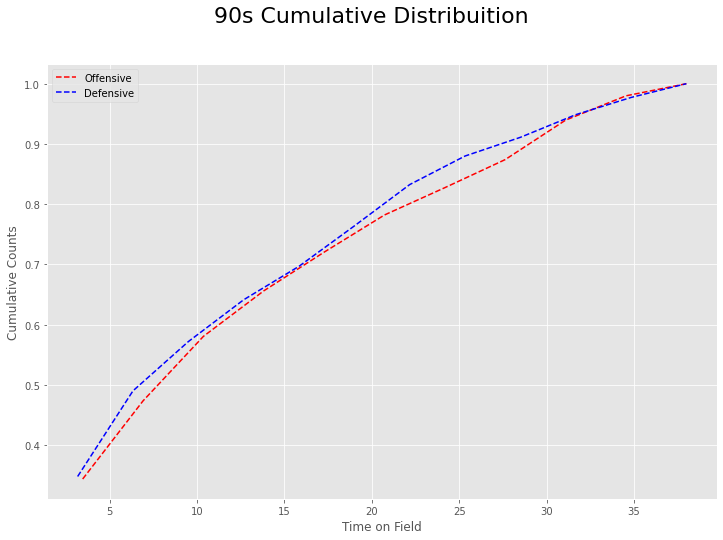

In [83]:
Off = Player.loc[Player.Type == 1]['90s']
Def = Player.loc[Player.Type == 0]['90s']



fig, axs = plt.subplots(figsize = (12,8),sharey = True)

plt.suptitle('90s Cumulative Distribuition',fontsize = 22)
##
counts, bin_edges = np.histogram(Off, bins='sturges', density=True)
cdf = np.cumsum(counts) * np.diff(bin_edges)  
axs.plot(bin_edges[1:], cdf, 'r--', label='Offensive')

##
counts, bin_edges = np.histogram(Def, bins='sturges', density=True)
cdf = np.cumsum(counts) * np.diff(bin_edges) 
axs.plot(bin_edges[1:], cdf, 'r--', label='Defensive',color = 'blue')
#
axs.set_xlabel('Time on Field')
axs.set_ylabel('Cumulative Counts')
plt.legend()
plt.show()

## Classifier

In [8]:
Player.loc[((Player['Won'].notnull())|(Player['Lost'].notnull()))&(~Player.Pos.str.match('MF'))].shape

(2006, 25)

In [26]:
cols = ['90s', 'CrdY',
       'CrdR', '2CrdY', 'Fls', 'Fld', 'Off', 'Crs', 'Int', 'TklW', 'PKwon',
       'PKcon', 'OG','Recov','Won','Lost']
scaler = StandardScaler()

X = scaler.fit_transform(Player[cols].loc[((Player['Won'].notnull())|(Player['Lost'].notnull()))&(~Player.Pos.str.match('MF'))])
y = Player['Type'].loc[((Player['Won'].notnull())|(Player['Lost'].notnull()))&(~Player.Pos.str.match('MF'))].values

X_test = scaler.fit_transform(Player_test[cols].loc[((Player_test['Won'].notnull())|(Player_test['Lost'].notnull()))&(~Player_test.Pos.str.match('MF'))])
y_test = Player_test['Type'].loc[((Player_test['Won'].notnull())|(Player_test['Lost'].notnull()))&(~Player_test.Pos.str.match('MF'))].values

X.shape

(2006, 16)

In [21]:
y.shape

(2006,)

In [27]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X, y)

y_pred_logreg = logreg.predict(X_test)

In [30]:
print("Regressão Logística:")
print(f"Acurácia: {accuracy_score(y_test, y_pred_logreg):.2f}")
print(classification_report(y_test, y_pred_logreg))

Regressão Logística:
Acurácia: 0.87
              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90       387
         1.0       0.82      0.87      0.84       244

    accuracy                           0.87       631
   macro avg       0.87      0.87      0.87       631
weighted avg       0.88      0.87      0.88       631



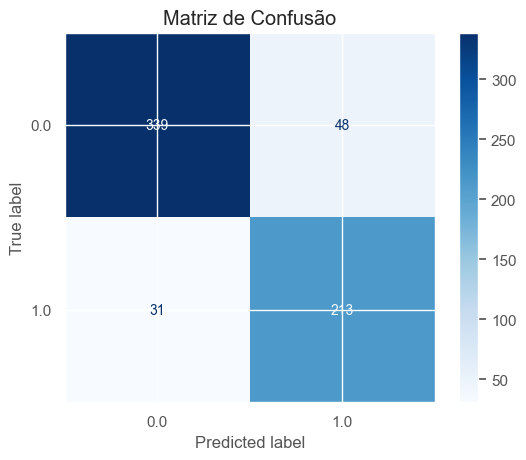

In [29]:
cm = confusion_matrix(y_test, y_pred_logreg)

# Exibir a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)  # Use o modelo apropriado
disp.plot(cmap='Blues')  # Escolha a paleta de cores
plt.title('Matriz de Confusão')
plt.show()

In [40]:
coeficientes = logreg.coef_[0]
feature_importance = pd.DataFrame({
'Feature': cols,
'Coeficientes':coeficientes,
'Coeficiente Absoluto': np.abs(coeficientes)
})
feature_importance = feature_importance.sort_values(by='Coeficiente Absoluto', ascending=False)
feature_importance

,Feature,Coeficientes,Coeficiente Absoluto
15,Lost,3.316026,3.316026
6,Off,3.237437,3.237437
8,Int,-2.534170,2.534170
0,90s,-2.231162,2.231162
14,Won,-1.360389,1.360389
5,Fld,1.340762,1.340762
9,TklW,-1.008047,1.008047
11,PKcon,-0.777300,0.777300
4,Fls,0.754932,0.754932
7,Crs,0.668784,0.668784


In [11]:
pca_2d = PCA(n_components=2)
data_pca2 = pca_2d.fit_transform(X)
df_PCA = pd.DataFrame(data_pca2, columns=['PC1','PC2'])
df_PCA['Type'] = Player.loc[((Player['Won'].notnull())|(Player['Lost'].notnull()))&(~Player.Pos.str.match('MF'))]['Type'].values
df_PCA.head()

,PC1,PC2,Type
0,-2.526912,-0.055713,1.0
1,3.774124,1.294686,1.0
2,0.123586,1.158629,1.0
3,-1.935386,-0.235654,0.0
4,2.120048,3.070116,1.0


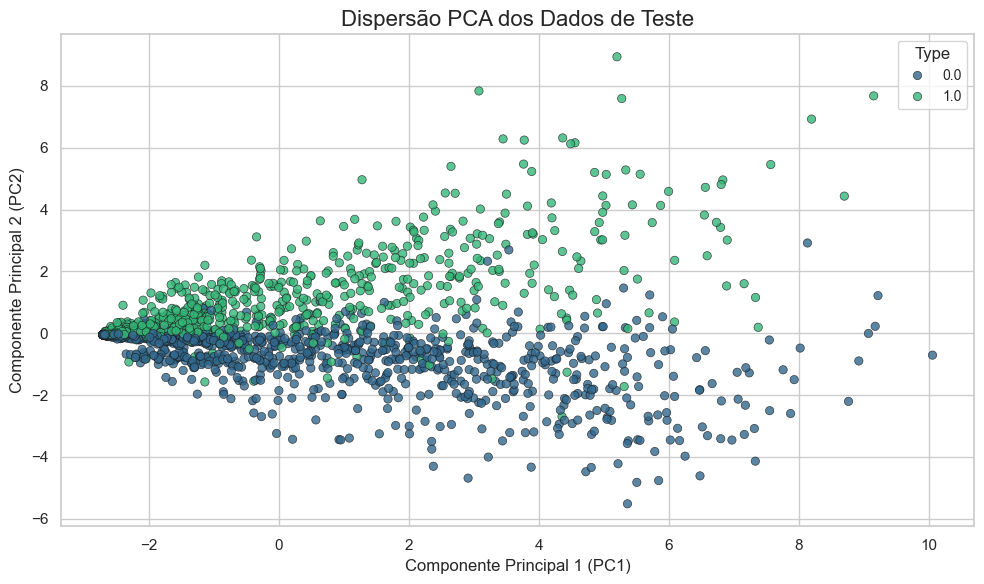

In [31]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df_PCA, 
    x='PC1', 
    y='PC2', 
    hue='Type',  # Diferencia as cores por tipo
    palette='viridis',  # Escolha uma paleta de cores
    alpha=0.8,  # Transparência dos pontos
    edgecolor='k'  # Contorno dos pontos
)

# Personalizar o gráfico
plt.title('Dispersão PCA dos Dados de Teste', fontsize=16)
plt.xlabel('Componente Principal 1 (PC1)', fontsize=12)
plt.ylabel('Componente Principal 2 (PC2)', fontsize=12)
plt.legend(title='Type', loc='best', fontsize=10)
plt.tight_layout()

plt.show()

In [32]:
pca_2d = PCA(n_components=2)
data_pca2 = pca_2d.fit_transform(X_test)
df_PCA = pd.DataFrame(data_pca2, columns=['PC1','PC2'])
df_PCA['Type'] = Player_test.loc[((Player_test['Won'].notnull())|(Player_test['Lost'].notnull()))&(~Player_test.Pos.str.match('MF'))]['Type'].values
df_PCA.head()

,PC1,PC2,Type
0,-1.694281,-0.077117,1.0
1,-0.993610,0.082184,0.0
2,0.861005,3.137526,0.0
3,-2.177426,-0.348373,1.0
4,-2.624232,0.046792,0.0


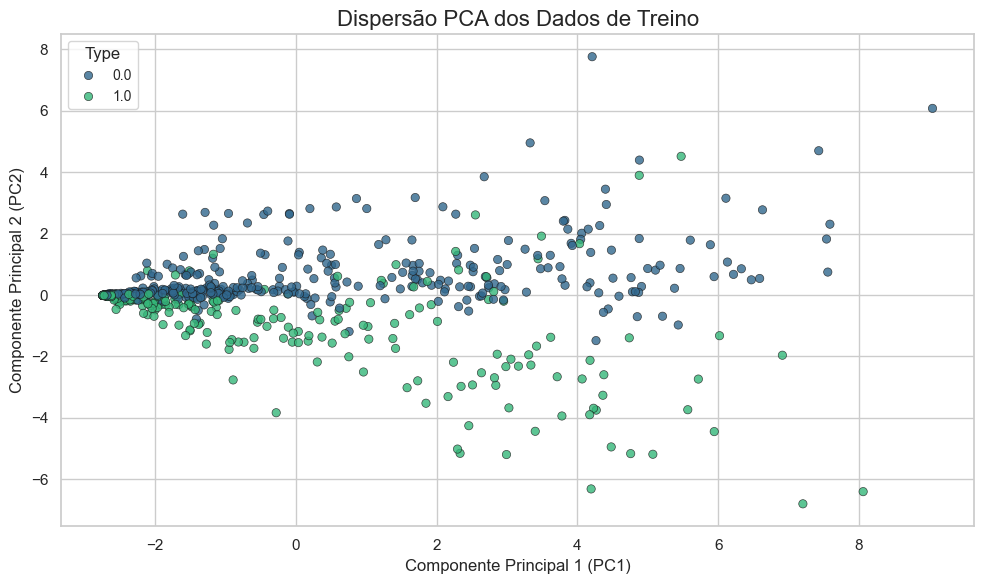

In [33]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df_PCA, 
    x='PC1', 
    y='PC2', 
    hue='Type',  # Diferencia as cores por tipo
    palette='viridis',  # Escolha uma paleta de cores
    alpha=0.8,  # Transparência dos pontos
    edgecolor='k'  # Contorno dos pontos
)

# Personalizar o gráfico
plt.title('Dispersão PCA dos Dados de Treino', fontsize=16)
plt.xlabel('Componente Principal 1 (PC1)', fontsize=12)
plt.ylabel('Componente Principal 2 (PC2)', fontsize=12)
plt.legend(title='Type', loc='best', fontsize=10)
plt.tight_layout()

plt.show()